In [85]:
import pandas as pd
import numpy as np
from sklearn.svm import SVR
from sklearn.linear_model import SGDRegressor,LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import explained_variance_score,r2_score
from sklearn.model_selection import train_test_split, GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel,WhiteKernel
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [35]:
data = pd.read_csv('Features_Zipcode_Final.csv')

In [36]:
data.head()

,ZIPCODE,TOTAL STREET LENGTH,TOTAL BIKE LANE LENGTH,BIKE LANE DENSITY,NUM_DOCKS_AVAILABLE,TRIPS,NORMALIZED ACCIDENT COUNT,WHITE_POP %,POPULATION,ACCIDENT COUNT,MEAN INCOME
0,11436,NaN,NaN,NaN,NaN,8192.653036,0.378388,7.031032,17949.0,31.0,29271.0
1,11213,146367.805288,28632.146155,0.195618,NaN,780.000000,45.128205,28.880142,63767.0,352.0,29216.0
2,11212,215912.786687,40575.901547,0.187927,NaN,87326.231788,0.381329,11.172781,84500.0,333.0,20958.0
3,11225,114141.251961,26079.822125,0.228487,149.0,6879.000000,4.564617,31.436415,56829.0,314.0,38992.0
4,11218,208355.389994,24186.845000,0.116085,23.0,1186.000000,28.667791,62.269343,75220.0,340.0,36189.0


In [37]:
data.shape

(248, 11)

In [38]:
data1 = data[['ZIPCODE','BIKE LANE DENSITY','WHITE_POP %','MEAN INCOME','POPULATION']].dropna().set_index('ZIPCODE',drop=True)
data1.columns = data1.columns.str.replace(' ', '_')
data1.shape

(172, 4)

In [39]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 172 entries, 11213 to 10310
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   BIKE_LANE_DENSITY  172 non-null    float64
 1   WHITE_POP_%        172 non-null    float64
 2   MEAN_INCOME        172 non-null    float64
 3   POPULATION         172 non-null    float64
dtypes: float64(4)
memory usage: 6.7 KB


In [40]:
data.shape

(248, 11)

In [41]:
data1.head()

,BIKE_LANE_DENSITY,WHITE_POP_%,MEAN_INCOME,POPULATION
ZIPCODE,,,,
11213,0.195618,28.880142,29216.0,63767.0
11212,0.187927,11.172781,20958.0,84500.0
11225,0.228487,31.436415,38992.0,56829.0
11218,0.116085,62.269343,36189.0,75220.0
11226,0.136211,16.696531,31064.0,101572.0


In [42]:
data1.shape

(172, 4)

In [55]:
data1=data1[(data1["MEAN_INCOME"] < data1["MEAN_INCOME"].quantile(.98)) & (data1["MEAN_INCOME"] > data1["MEAN_INCOME"].quantile(.02))]
data1.shape

(146, 4)

In [56]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()

cols=data1.columns
data1[cols]=scaler.fit_transform(data1[cols])

C:\Users\omhai\AppData\Local\Temp\ipykernel_29580\2166695595.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1[cols]=scaler.fit_transform(data1[cols])


In [57]:
data1.head()

,BIKE_LANE_DENSITY,WHITE_POP,MEAN_INCOME,POPULATION
ZIPCODE,,,,
11213,0.375366,0.243643,0.095781,0.566160
11212,0.360590,0.074801,0.019026,0.761005
11225,0.438516,0.268017,0.186645,0.500959
11218,0.222562,0.562014,0.160593,0.673793
11226,0.261230,0.127471,0.112958,0.921444


In [58]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146 entries, 11213 to 10310
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   BIKE_LANE_DENSITY  146 non-null    float64
 1   WHITE_POP          146 non-null    float64
 2   MEAN_INCOME        146 non-null    float64
 3   POPULATION         146 non-null    float64
dtypes: float64(4)
memory usage: 5.7 KB


In [59]:
import seaborn as sns

In [60]:
data1.head()

,BIKE_LANE_DENSITY,WHITE_POP,MEAN_INCOME,POPULATION
ZIPCODE,,,,
11213,0.375366,0.243643,0.095781,0.566160
11212,0.360590,0.074801,0.019026,0.761005
11225,0.438516,0.268017,0.186645,0.500959
11218,0.222562,0.562014,0.160593,0.673793
11226,0.261230,0.127471,0.112958,0.921444


C:\Users\omhai\anaconda3\envs\geo_env\lib\site-packages\seaborn\categorical.py:470: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


<AxesSubplot: >

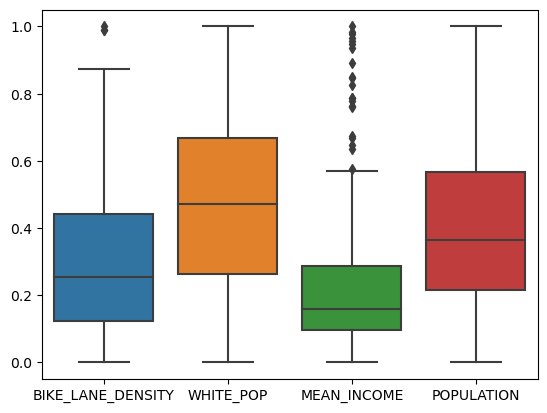

In [61]:
sns.boxplot(data=data1)

base = 10

data1['Log_WHITE_POP %'] = np.log(np.array(data1['WHITE_POP %'])+1e-)/np.log(base)
data1['Log_BIKE_LANE_DENSITY'] = np.log(np.array(data1['BIKE_LANE_DENSITY'])+1e-9)/np.log(base)



root = 2
#data1['Root_NORMALIZED_ACCIDENT_COUNT'] = np.power((np.array(data1['NORMALIZED_ACCIDENT_COUNT'])),1/root)
data1['Root_BIKE_LANE_DENSITY'] = np.power((np.array(data1['BIKE_LANE_DENSITY'])),1/root)

#data1['LR_NORMALIZED_ACCIDENT_COUNT'] = np.log(np.array(data1['Root_NORMALIZED_ACCIDENT_COUNT'])+1e-1)/np.log(base)
data1['LR_BIKE_LANE_DENSITY'] = np.log(np.array(data1['Root_BIKE_LANE_DENSITY'])+1e-9)/np.log(base)

In [62]:
data1.head()

,BIKE_LANE_DENSITY,WHITE_POP,MEAN_INCOME,POPULATION
ZIPCODE,,,,
11213,0.375366,0.243643,0.095781,0.566160
11212,0.360590,0.074801,0.019026,0.761005
11225,0.438516,0.268017,0.186645,0.500959
11218,0.222562,0.562014,0.160593,0.673793
11226,0.261230,0.127471,0.112958,0.921444


In [63]:
data1.describe()

,BIKE_LANE_DENSITY,WHITE_POP,MEAN_INCOME,POPULATION
count,146.000000,146.000000,146.000000,146.000000
mean,0.309622,0.461150,0.260650,0.413549
std,0.238893,0.246929,0.257787,0.242908
min,0.000000,0.000000,0.000000,0.000000
25%,0.124397,0.262322,0.096371,0.215957
50%,0.253476,0.471669,0.159533,0.363864
75%,0.442245,0.667345,0.286928,0.565505
max,1.000000,1.000000,1.000000,1.000000


In [64]:
data1.shape

(146, 4)

In [65]:
data1.columns=["BIKE_LANE_DENSITY","WHITE_POP","MEAN_INCOME","POPULATION"]

In [66]:
lm = smf.ols(formula='BIKE_LANE_DENSITY ~ WHITE_POP + MEAN_INCOME + POPULATION',data=data1).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      BIKE_LANE_DENSITY   R-squared:                       0.272
Model:                            OLS   Adj. R-squared:                  0.257
Method:                 Least Squares   F-statistic:                     17.69
Date:                Fri, 09 Dec 2022   Prob (F-statistic):           8.22e-10
Time:                        22:40:17   Log-Likelihood:                 25.549
No. Observations:                 146   AIC:                            -43.10
Df Residuals:                     142   BIC:                            -31.16
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.1522      0.053      2.871      0.005       0.047       0.257
WHITE_POP      -0.0544      0.088     -0.618      0.537      -0.228       0.120
MEAN_INCOME     0.5366      0.087      6.200      0.000       0.365       0.708
POPULATION      0.1031      0.075      1.379      0.170      -0.045       0.251
==============================================================================
Omnibus:                       24.454   Durbin-Watson:                   1.959
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               33.323
Skew:                           0.932   Prob(JB):                     5.81e-08
Kurtosis:                       4.415   Cond. No.                         7.89
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<b>The p-value is population and white population >0.05 and R-square value is very low.

#### Transformations

**a) Log to the base 10 transformation**

In [116]:
base = 10

data1['Log_POPULATION'] = np.log(np.array(data1['POPULATION'])+1e-2)/np.log(base)
data1['Log_BIKE_LANE_DENSITY'] = np.log(np.array(data1['BIKE_LANE_DENSITY'])+1e-2)/np.log(base)
data1['Log_MEAN_INCOME'] = np.log(np.array(data1['MEAN_INCOME'])+1e-2)/np.log(base)
data1['Log_WHITE_POP'] = np.log(np.array(data1['WHITE_POP'])+1e-2)/np.log(base)

In [117]:
lm = smf.ols(formula='Log_BIKE_LANE_DENSITY ~ Log_WHITE_POP + Log_MEAN_INCOME + Log_POPULATION',data=data1).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     Log_BIKE_LANE_DENSITY   R-squared:                       0.187
Model:                               OLS   Adj. R-squared:                  0.170
Method:                    Least Squares   F-statistic:                     10.87
Date:                   Fri, 09 Dec 2022   Prob (F-statistic):           1.80e-06
Time:                           23:33:11   Log-Likelihood:                -69.205
No. Observations:                    146   AIC:                             146.4
Df Residuals:                        142   BIC:                             158.3
Df Model:                              3                                         
Covariance Type:               nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -0.1870      0.105     -1.779      0.077      -0.395       0.021
Log_WHITE_POP       0.3330      0.111      3.006      0.003       0.114       0.552
Log_MEAN_INCOME     0.2896      0.109      2.666      0.009       0.075       0.504
Log_POPULATION      0.2400      0.101      2.365      0.019       0.039       0.441
==============================================================================
Omnibus:                       20.521   Durbin-Watson:                   1.727
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               25.354
Skew:                          -0.860   Prob(JB):                     3.12e-06
Kurtosis:                       4.100   Cond. No.                         6.94
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Let us plot and see the result

**b) Root - 2**

In [118]:
root = 2
data1['Root_WHITE_POP'] = np.power((np.array(data1['WHITE_POP'])),1/root)
data1['Root_BIKE_LANE_DENSITY'] = np.power((np.array(data1['BIKE_LANE_DENSITY'])),1/root)
data1['Root_MEAN_INCOME'] = np.power((np.array(data1['MEAN_INCOME'])),1/root)
data1['Root_POPULATION'] = np.power((np.array(data1['POPULATION'])),1/root)

In [119]:
lm = smf.ols(formula='Root_BIKE_LANE_DENSITY ~ Root_WHITE_POP + Root_MEAN_INCOME + Root_POPULATION',data=data1).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     Root_BIKE_LANE_DENSITY   R-squared:                       0.235
Model:                                OLS   Adj. R-squared:                  0.219
Method:                     Least Squares   F-statistic:                     14.56
Date:                    Fri, 09 Dec 2022   Prob (F-statistic):           2.54e-08
Time:                            23:33:11   Log-Likelihood:                 30.519
No. Observations:                     146   AIC:                            -53.04
Df Residuals:                         142   BIC:                            -41.10
Df Model:                               3                                         
Covariance Type:                nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.0964      0.087      1.109      0.269      -0.075       0.268
Root_WHITE_POP       0.0866      0.100      0.863      0.390      -0.112       0.285
Root_MEAN_INCOME     0.4826      0.100      4.825      0.000       0.285       0.680
Root_POPULATION      0.2216      0.087      2.540      0.012       0.049       0.394
==============================================================================
Omnibus:                        1.563   Durbin-Watson:                   1.859
Prob(Omnibus):                  0.458   Jarque-Bera (JB):                1.156
Skew:                           0.191   Prob(JB):                        0.561
Kurtosis:                       3.211   Cond. No.                         11.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Best Model Currently

In [120]:
lm = smf.ols(formula='Root_BIKE_LANE_DENSITY ~ Log_WHITE_POP + Root_MEAN_INCOME + Root_POPULATION',data=data1).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     Root_BIKE_LANE_DENSITY   R-squared:                       0.251
Model:                                OLS   Adj. R-squared:                  0.235
Method:                     Least Squares   F-statistic:                     15.84
Date:                    Fri, 09 Dec 2022   Prob (F-statistic):           6.13e-09
Time:                            23:33:11   Log-Likelihood:                 32.014
No. Observations:                     146   AIC:                            -56.03
Df Residuals:                         142   BIC:                            -44.09
Df Model:                               3                                         
Covariance Type:                nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.2153      0.089      2.406      0.017       0.038       0.392
Log_WHITE_POP        0.1056      0.055      1.923      0.057      -0.003       0.214
Root_MEAN_INCOME     0.4448      0.093      4.801      0.000       0.262       0.628
Root_POPULATION      0.2203      0.086      2.551      0.012       0.050       0.391
==============================================================================
Omnibus:                        1.696   Durbin-Watson:                   1.819
Prob(Omnibus):                  0.428   Jarque-Bera (JB):                1.253
Skew:                           0.182   Prob(JB):                        0.535
Kurtosis:                       3.271   Cond. No.                         11.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

L=[]
tran=["Log_","Root_"]

for i in tran:
    for j in tran:
        for k in tran:
            for l in tran:
                lm = smf.ols(formula='{}BIKE_LANE_DENSITY ~ {}Root_WHITE_POP + {}Root_MEAN_INCOME + {}Root_POPULATION'.format(i,j,k,l),data=data1).fit()
                L.append([i,j,k,l,lm.rsquared_adj,[lm.pvalues]])
                
L

In [121]:
lm = smf.ols(formula='Log_BIKE_LANE_DENSITY ~ Root_WHITE_POP + Root_MEAN_INCOME + Root_POPULATION',data=data1).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     Log_BIKE_LANE_DENSITY   R-squared:                       0.207
Model:                               OLS   Adj. R-squared:                  0.190
Method:                    Least Squares   F-statistic:                     12.33
Date:                   Fri, 09 Dec 2022   Prob (F-statistic):           3.24e-07
Time:                           23:33:11   Log-Likelihood:                -67.391
No. Observations:                    146   AIC:                             142.8
Df Residuals:                        142   BIC:                             154.7
Df Model:                              3                                         
Covariance Type:               nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -1.5104      0.170     -8.888      0.000      -1.846      -1.174
Root_WHITE_POP       0.3051      0.196      1.555      0.122      -0.083       0.693
Root_MEAN_INCOME     0.7520      0.196      3.844      0.000       0.365       1.139
Root_POPULATION      0.5130      0.171      3.007      0.003       0.176       0.850
==============================================================================
Omnibus:                       16.530   Durbin-Watson:                   1.764
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               19.067
Skew:                          -0.753   Prob(JB):                     7.24e-05
Kurtosis:                       3.930   Cond. No.                         11.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [122]:
lm.rsquared

0.20667852694114996

In [123]:
lm.pvalues

Intercept           2.534931e-15
Root_WHITE_POP      1.221801e-01
Root_MEAN_INCOME    1.818222e-04
Root_POPULATION     3.123461e-03
dtype: float64

### Decision Tree

In [126]:
param_grid_dtr = {'random_state':[123],'min_samples_leaf':[5, 10, 20, 50, 100],'max_depth':[2, 3, 5, 10, 20],'splitter':['best'],'criterion':['squared_error','friedman_mse','absolute_error','poisson'],'max_features':['auto','sqrt','log2'],'ccp_alpha':[1e-2,1e-1,1]}
dtr=DecisionTreeRegressor()

gr=GridSearchCV(dtr,param_grid=param_grid_dtr,cv=5)

gr.fit(data1[["Log_WHITE_POP","Root_MEAN_INCOME","Root_POPULATION"]],np.array(data1["Root_BIKE_LANE_DENSITY"]).reshape(-1,1))

gr.best_params_

{'ccp_alpha': 0.01,
 'criterion': 'absolute_error',
 'max_depth': 2,
 'max_features': 'auto',
 'min_samples_leaf': 5,
 'random_state': 123,
 'splitter': 'best'}

In [127]:
y_train=np.array(data1["Root_BIKE_LANE_DENSITY"]).reshape(-1,1)
y_train_pred = gr.predict(data1[["Log_WHITE_POP","Root_MEAN_INCOME","Root_POPULATION"]])

r2_score(y_train, y_train_pred)

0.3048332626936403

#### Random Forest

In [128]:
param_grid_rfr={'n_estimators':[2000],'criterion':['squared_error','poisson'],'max_features':[None],'ccp_alpha':[1e-2,1e-3]}
#param_grid_rfr = {'ccp_alpha':[1,1e-1],'criterion': ['squared_error','absolute_error'],'max_features': ['sqrt'],'n_estimators': [2000]}

In [130]:
rfr = RandomForestRegressor()

gr=GridSearchCV(rfr,param_grid=param_grid_rfr,cv=5)
#gr=GridSearchCV(rfr,param_grid=param_grid_rfr,cv=5,verbose=2)
#gr =GridSearchCV(gbr,param_grid=param_grid_gbr,cv=5,verbose=1)
gr.fit(data1[["Log_WHITE_POP","Root_MEAN_INCOME","Root_POPULATION"]],np.array(data1["Root_BIKE_LANE_DENSITY"]).reshape(-1,1))                  

#Output the best parameter
gr.best_params_

{'ccp_alpha': 0.001,
 'criterion': 'squared_error',
 'max_features': None,
 'n_estimators': 2000}

In [131]:
y_train=np.array(data1["Root_BIKE_LANE_DENSITY"]).reshape(-1,1)
y_train_pred = gr.predict(data1[["Log_WHITE_POP","Root_MEAN_INCOME","Root_POPULATION"]])

r2_score(y_train, y_train_pred)

0.6628386835861017